### Example of Z-Score for Outlier Detection:

The Z-score measures how far a data point is from the mean, in terms of standard deviations. A Z-score greater than 3 or less than -3 often indicates an outlier.

Formula:

𝑍 = 𝑋 − 𝜇 / 𝜎
 
Where:

X is the data point.

μ is the mean of the dataset.

σ is the standard deviation of the dataset.

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Example data
data = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74, 200]  # Adding an outlier

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['marks'])

# Calculate Z-scores
df['z_score'] = zscore(df['marks'])

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = df[df['z_score'].abs() > 3]
print(outliers)


    marks   z_score
17    200  3.393311


### Interquartile Range (IQR) Method

The Interquartile Range (IQR) is a measure of statistical dispersion, or in simpler terms, the spread of the middle 50% of values in the dataset. Outliers are defined as values that are beyond 1.5 times the IQR from Q1 (25th percentile) and Q3 (75th percentile).

Formula:

Lower Bound: Q1 - 1.5 × IQR

Upper Bound: Q3 + 1.5 × IQR

In [23]:
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(df['marks'], 25)
Q3 = np.percentile(df['marks'], 75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['marks'] < lower_bound) | (df['marks'] > upper_bound)]
print(outliers_iqr)


    marks   z_score
17    200  3.393311


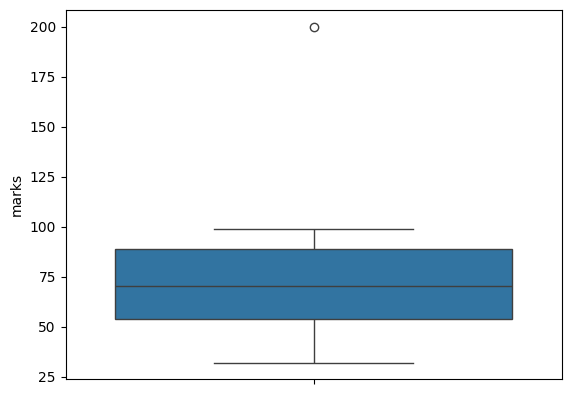

In [24]:
# Visualize the outlier

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(data=df['marks'])
plt.show()


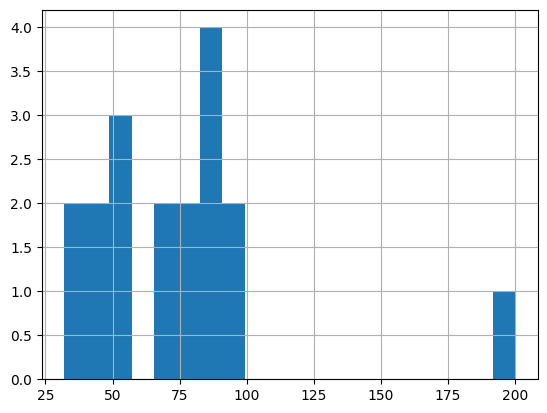

In [25]:
df['marks'].hist(bins=20)
plt.show()


### How to Handle Outliers?
Once outliers are detected, there are several ways to handle them. You can remove, impute, or transform the data to handle outliers.

A. Removing Outliers
If the outliers are errors or don't add value to your analysis, you can remove them from your dataset. This is the simplest approach but should be done carefully to avoid losing valuable data.

In [5]:
# Remove outliers based on Z-score method
df_no_outliers = df[df['z_score'].abs() <= 3]
print(df_no_outliers)

# Remove outliers based on IQR method
df_no_outliers_iqr = df[(df['marks'] >= lower_bound) & (df['marks'] <= upper_bound)]
print(df_no_outliers_iqr)


    marks   z_score
0      45 -0.820013
1      32 -1.173388
2      56 -0.521002
3      75 -0.004530
4      89  0.376028
5      54 -0.575368
6      32 -1.173388
7      89  0.376028
8      90  0.403211
9      87  0.321662
10     67 -0.221992
11     54 -0.575368
12     45 -0.820013
13     98  0.620672
14     99  0.647855
15     67 -0.221992
16     74 -0.031713
    marks   z_score
0      45 -0.820013
1      32 -1.173388
2      56 -0.521002
3      75 -0.004530
4      89  0.376028
5      54 -0.575368
6      32 -1.173388
7      89  0.376028
8      90  0.403211
9      87  0.321662
10     67 -0.221992
11     54 -0.575368
12     45 -0.820013
13     98  0.620672
14     99  0.647855
15     67 -0.221992
16     74 -0.031713


B. Imputing Outliers
Sometimes, it’s not a good idea to remove outliers, especially if you believe they represent valid data but are just extreme values. In such cases, you can impute the outliers, for example, replacing them with the mean, median, or a value within the acceptable range.

Example of Imputing with Median:
python
Copy code


In [6]:
median_value = df['marks'].median()
df['marks'] = np.where(df['marks'] > upper_bound, median_value, df['marks'])
df['marks'] = np.where(df['marks'] < lower_bound, median_value, df['marks'])


C. Transforming Data
Outliers can also be handled by applying a transformation to the data that minimizes the influence of extreme values.

1) Log Transformation: This can be used to compress the range of extreme values.

2) Square Root Transformation: This reduces the impact of higher values in positively skewed data.

In [7]:
# Applying log transformation (for positive values only)
df['log_marks'] = np.log(df['marks'] + 1)  # Adding 1 to avoid log(0)


3) Winsorization: This technique involves capping the extreme values at a certain percentile (e.g., 1st and 99th percentile).

In [10]:
from scipy.stats import mstats

# Winsorize the data to cap the outliers
df['winsorized_marks'] = mstats.winsorize(df['marks'], limits=[0.05, 0.05])  # Limits 5% on both sides


## 5 number Summary And Box Plot

In [1]:
## Minimum,MAximum,Median,Q1,Q3,IQR

In [26]:
import numpy as np

In [27]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [39]:
minimum,Q1,median,Q3,maximum

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [29]:
IQR=Q3-Q1
print(IQR)

35.0


In [40]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)


In [31]:
lower_fence

np.float64(1.5)

In [32]:
higher_fence

np.float64(141.5)

In [33]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

In [34]:
import seaborn as sns

<Axes: >

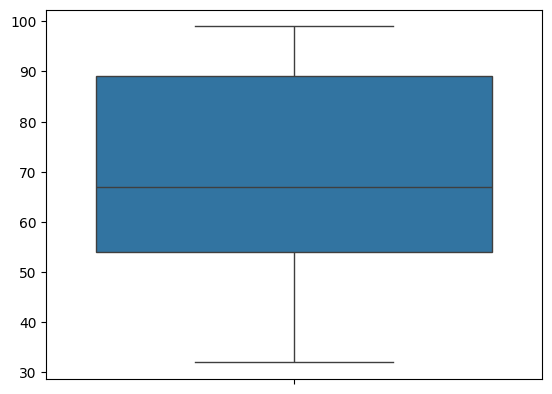

In [35]:
sns.boxplot(lst_marks)

In [41]:
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<Axes: >

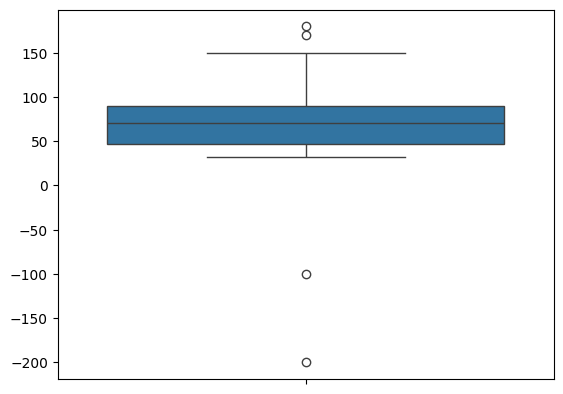

In [42]:
sns.boxplot(lst_marks)